In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt


In [2]:

def random_walk_cgraph(graph_size ,steps, visit_counts):
    x_pos = 0
    probabilities = [-1, 1]
    x_li = [x_pos]
    visit_counts[0][x_pos] += 1

    for i in range(1, steps):
        x_pos += random.choice(probabilities)
        x_li.append(x_pos % graph_size)
        visit_counts[i][x_pos % graph_size] += 1

    return x_li



In [3]:
def plot_prob(graph_size, steps):
    steps = steps + 1
    reps = 100
    
    visit_counts = [np.zeros(graph_size) for _ in range(steps)]

    for i in range(reps):
        random_walk_cgraph(graph_size, steps, visit_counts)
    # print(visit_counts)


    node_prob = [np.zeros(graph_size) for _ in range(steps)]
    for i in range(steps):
        node_prob[i] = visit_counts[i] / reps

    
    fig, axs = plt.subplots(3, 7, figsize=(24, 10))
    axs = axs.flatten()
    for i, probs in enumerate(node_prob):
        filtered = np.zeros(graph_size)
        for j, val in enumerate(probs):
            filtered[j] = filtered[j] + val
        axs[i].bar(range(graph_size), filtered)
        axs[i].set_title(f"Step {i}")
        axs[i].set_ylim(0, 1)
        axs[i].set_xlabel("Position state")
        axs[i].set_ylabel("Probability")

    
    plt.tight_layout()
    plt.show()


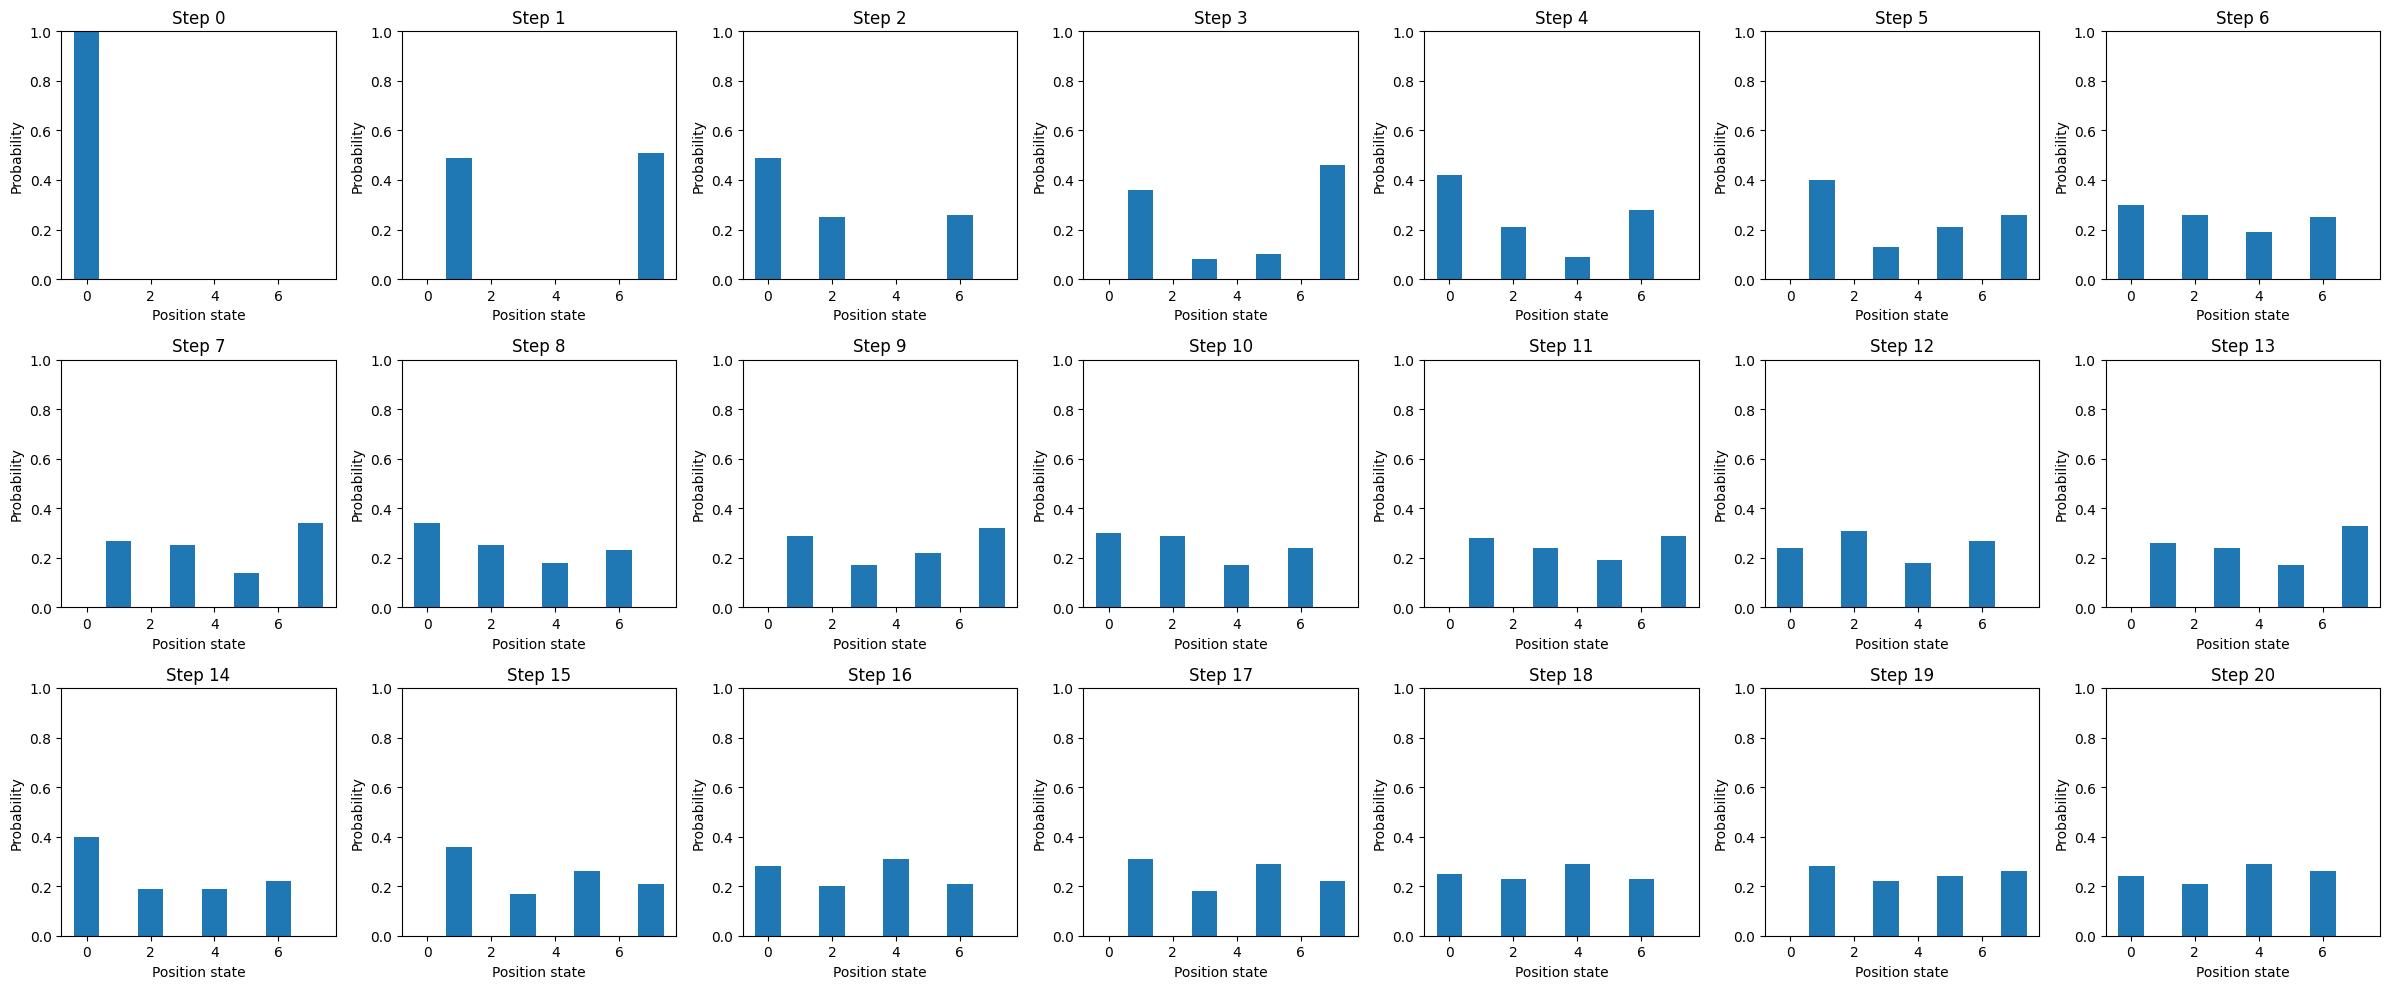

In [4]:
plot_prob(8, 20)